## KNN을 활용해 이상값 찾기
- 목표와 요인을 선택하는 것이 간단해도, 변수 간의 관계에 대한 가정 없이 이상값을 식별하는 것이 도움이 될 수 있다.
- 다른 관측값과 가장 동떨어진 값을 찾는 데에 활용 가능하다.

### PyOD, 사이킷런 활용

In [2]:
import pandas as pd
from pyod.models.knn import KNN
from sklearn.preprocessing import StandardScaler

covidtotals=pd.read_csv('C:/data-cleansing-main/Chapter04/data/covidtotals.csv')
covidtotals.set_index('iso_code',inplace=True)

### 스케일링
- 표준스케일러: z-점수 반환
- z-점수: 각 변수 값에서 변수 평균을 뺀 값을 표준 편차로 나눈 값
- 머신러닝 도구 대부분은 표준화된 데이터를 필요로 함.

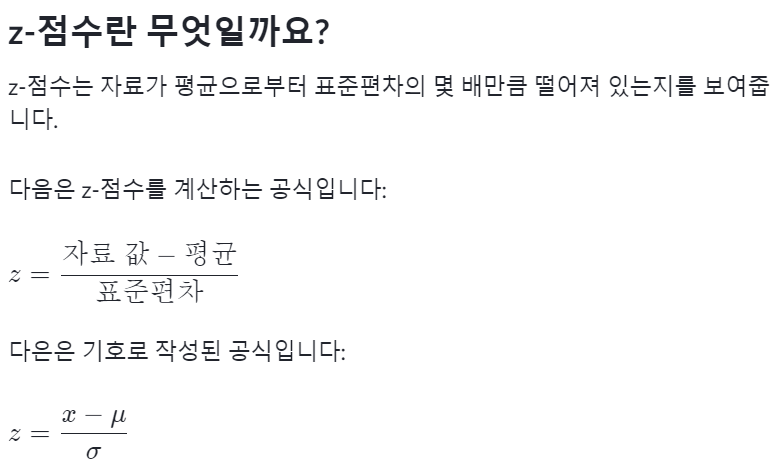


In [3]:
# 분석 열의 표준화된 데이터프레임 생성
standardizer=StandardScaler()           # 스케일러를 만들고
analysisvars=['location','total_cases_pm','total_deaths_pm','pop_density','median_age','gdp_per_capita']
covidanalysis=covidtotals.loc[:,analysisvars].dropna()
covidanalysisstand=standardizer.fit_transform(covidanalysis.iloc[:,1:])     # 스케일러에 넣기

### KNN 모델 생성 및 예측

In [5]:
clf_name='KNN'
clf=KNN(contamination=0.1)          # 임의의 개수의 이상값 생성
clf.fit(covidanalysisstand)

y_pred=clf.labels_                  # 예측값에 라벨값을 넣고
y_scores=clf.decision_scores_       # 점수에 결정 계수 넣기(?)

In [7]:
# 모델 예측
pred=pd.DataFrame(zip(y_pred,y_scores),
                  columns=['outliers','scores'],
                  index=covidanalysis.index)
pred.sample(10,random_state=2)

,outliers,scores
iso_code,,
BHR,1,2.842906
BRA,0,0.961794
UGA,0,0.236686
BGR,0,0.537156
CHN,0,0.469053
BGD,0,1.162860
GRD,0,0.388448
QAT,1,8.001605
PRT,0,1.236215


In [8]:
pred.outliers.value_counts()

0    157
1     18
Name: outliers, dtype: int64

In [10]:
pred.groupby(['outliers'])[['scores']].agg(['min','median','max'])      # agg가 머더라..

scores                    
               min    median       max
outliers                              
0         0.081259  0.364803  1.519804
1         1.553681  2.096079  9.483549

In [11]:
# 이상값에 대한 COVID 데이터 표시
covidanalysis.join(pred).loc[pred.outliers==1,
                             ['location','total_cases_pm','total_deaths_pm','scores']].sort_values(['scores'],ascending=False)

,location,total_cases_pm,total_deaths_pm,scores
iso_code,,,,
SGP,Singapore,5962.727,3.931,9.483549
QAT,Qatar,19753.146,13.190,8.001605
HKG,Hong Kong,0.000,0.000,7.771722
BEL,Belgium,5037.354,816.852,3.544827
BHR,Bahrain,6698.468,11.166,2.842906
LUX,Luxembourg,6418.776,175.726,2.442886
ESP,Spain,5120.952,580.197,2.176441
KWT,Kuwait,6332.420,49.642,2.127519
GBR,United Kingdom,4047.403,566.965,2.103458
